In [30]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import cmath
from scipy.optimize import curve_fit
from scipy.stats import variation
from statistics import mean, median

Paste your 96 well format RLU data from Excel between the upper ''' and lower '''.

In [31]:
rawData = '''
8671840.496	9222918.804	48161.35442	49704.0567	2268408.719	2393086.887	3661109.773	4291006.032	8489580.926	8474427.146	143.802861	77.800731
5270337.616	4958244.666	1842238.331	1644579.332	963688.1231	859826.2608	4585455.817	5240202.576	301113.1874	338589.6246	163.003487	69.400463
711358.7935	700581.6225	6870483.2	7026608.637	2197919.086	2249093.506	3655908.545	3620730.774	1560565.556	1633201.484	93.401231	74.200616
51400.45273	58114.24769	5091812.478	5271740.6	372335.1937	389257.4293	624108.9627	637695.3678	5158102.65	5126782.279	117.402004	86.201
12874.51947	14186.31434	783103.3799	888894.1819	558572.7499	561230.4821	1403666.265	1312160.408	509660.4013	428010.313	131.802471	74.200616
9955.739384	8746.003488	5002501.168	5085606.377	4001819.136	4348946.361	5309188.25	5639796.327	3566.365022	3676.771943	63.400271	74.200616
7422.269317	7880.714065	2891560.447	3126965.17	4733769.233	4903039.372	391610.2437	469076.3632	3527.962639	3782.378662	77.800731	69.400463
3682.772322	3367.152801	5018352.686	4849522.909	162075.4148	160635.7587	4848858.574	4773392.474	4058.39668	3819.581052	63.400271	69.400463
'''
row_list = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
column_list = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']

plateTemplate = pd.DataFrame(index = row_list, columns = column_list)

rawData = pd.read_table(io.StringIO(rawData), delim_whitespace=True, names=plateTemplate.columns)
rawData.index = plateTemplate.index
rawData

,1,2,3,4,5,6,7,8,9,10,11,12
A,8.671840e+06,9.222919e+06,4.816135e+04,4.970406e+04,2.268409e+06,2.393087e+06,3.661110e+06,4.291006e+06,8.489581e+06,8.474427e+06,143.802861,77.800731
B,5.270338e+06,4.958245e+06,1.842238e+06,1.644579e+06,9.636881e+05,8.598263e+05,4.585456e+06,5.240203e+06,3.011132e+05,3.385896e+05,163.003487,69.400463
C,7.113588e+05,7.005816e+05,6.870483e+06,7.026609e+06,2.197919e+06,2.249094e+06,3.655909e+06,3.620731e+06,1.560566e+06,1.633201e+06,93.401231,74.200616
D,5.140045e+04,5.811425e+04,5.091812e+06,5.271741e+06,3.723352e+05,3.892574e+05,6.241090e+05,6.376954e+05,5.158103e+06,5.126782e+06,117.402004,86.201000
E,1.287452e+04,1.418631e+04,7.831034e+05,8.888942e+05,5.585727e+05,5.612305e+05,1.403666e+06,1.312160e+06,5.096604e+05,4.280103e+05,131.802471,74.200616
F,9.955739e+03,8.746003e+03,5.002501e+06,5.085606e+06,4.001819e+06,4.348946e+06,5.309188e+06,5.639796e+06,3.566365e+03,3.676772e+03,63.400271,74.200616
G,7.422269e+03,7.880714e+03,2.891560e+06,3.126965e+06,4.733769e+06,4.903039e+06,3.916102e+05,4.690764e+05,3.527963e+03,3.782379e+03,77.800731,69.400463
H,3.682772e+03,3.367153e+03,5.018353e+06,4.849523e+06,1.620754e+05,1.606358e+05,4.848859e+06,4.773392e+06,4.058397e+03,3.819581e+03,63.400271,69.400463


Paste your 96 well format plate template between the upper ''' and lower '''.

In [32]:
plateLayout = '''
A	A	SA1	SA1	SA9	SA9	SA17	SA17	SA25	SA25	SA33	SA33
B	B	SA2	SA2	SA10	SA10	SA18	SA18	SA26	SA26	SA34	SA34
C	C	SA3	SA3	SA11	SA11	SA19	SA19	SA27	SA27	SA35	SA35
D	D	SA4	SA4	SA12	SA12	SA20	SA20	SA28	SA28	SA36	SA36
E	E	SA5	SA5	SA13	SA13	SA21	SA21	SA29	SA29	SA37	SA37
F	F	SA6	SA6	SA14	SA14	SA22	SA22	SA30	SA30	SA38	SA38
G	G	SA7	SA7	SA15	SA15	SA23	SA23	SA31	SA31	SA39	SA39
H	H	SA8	SA8	SA16	SA16	SA24	SA24	SA32	SA32	SA40	SA40
'''

plateLayout = pd.read_table(io.StringIO(plateLayout), delim_whitespace=True, names=plateTemplate.columns)
plateLayout.index = plateTemplate.index
plateLayout

,1,2,3,4,5,6,7,8,9,10,11,12
A,A,A,SA1,SA1,SA9,SA9,SA17,SA17,SA25,SA25,SA33,SA33
B,B,B,SA2,SA2,SA10,SA10,SA18,SA18,SA26,SA26,SA34,SA34
C,C,C,SA3,SA3,SA11,SA11,SA19,SA19,SA27,SA27,SA35,SA35
D,D,D,SA4,SA4,SA12,SA12,SA20,SA20,SA28,SA28,SA36,SA36
E,E,E,SA5,SA5,SA13,SA13,SA21,SA21,SA29,SA29,SA37,SA37
F,F,F,SA6,SA6,SA14,SA14,SA22,SA22,SA30,SA30,SA38,SA38
G,G,G,SA7,SA7,SA15,SA15,SA23,SA23,SA31,SA31,SA39,SA39
H,H,H,SA8,SA8,SA16,SA16,SA24,SA24,SA32,SA32,SA40,SA40


Check that the standards values listed below are correct.

In [33]:
# In the [] after pd.Series, input the standard concentrations. Number separated by a comma.
# In the [] after index=, input the corresponding labels for each standard. Labels in 'quotes' separated by a comma.
standardConc = pd.Series([9661, 4026, 685.4, 137.5, 35.55, 17.97, 8.64, 4.32], index=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'], name='Conc')

In [34]:
wellID = []
sampleID = []
wellRLU = []
for row_data in row_list:
    for column_data in column_list:
        wellID.append(row_data + column_data)
        sampleID.append(plateLayout.at[row_data, column_data])
        wellRLU.append(rawData.at[row_data, column_data])

dataTable = pd.DataFrame({'Sample ID':sampleID, 'RLU':wellRLU}, index=wellID)

standardCurve = dataTable.groupby('Sample ID').mean()
standardCurve = pd.concat([standardConc, standardCurve], axis=1, join_axes=[standardConc.index])
standardCurve

,Conc,RLU
A,9661.00,8.947380e+06
B,4026.00,5.114291e+06
C,685.40,7.059702e+05
D,137.50,5.475735e+04
E,35.55,1.353042e+04
F,17.97,9.350871e+03
G,8.64,7.651492e+03
H,4.32,3.524963e+03


In [35]:
x_list = standardCurve['Conc'].tolist()
y_list = standardCurve['RLU'].tolist()

# This orders the coordinate pairs from lowest analyte concentration to highest.
standardCurve = sorted(zip(x_list, y_list))

# This strips out any 0s from the x and y lists and replaces them with 0.001.
x_list = [x_val if x_val != 0 else 0.001 for x_val in [x[0] for x in standardCurve]]
y_list = [y_val if y_val != 0 else 0.001 for y_val in [y[1] for y in standardCurve]]

[3524.9625614999995, 10083139.639109699, 86.525, 8947379.649999999, 1]
8329.94780379 10083139.6391 86.525 3705599.59839 1.0


/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


[0.1, 96610.0, 0, 10736855.579999998]

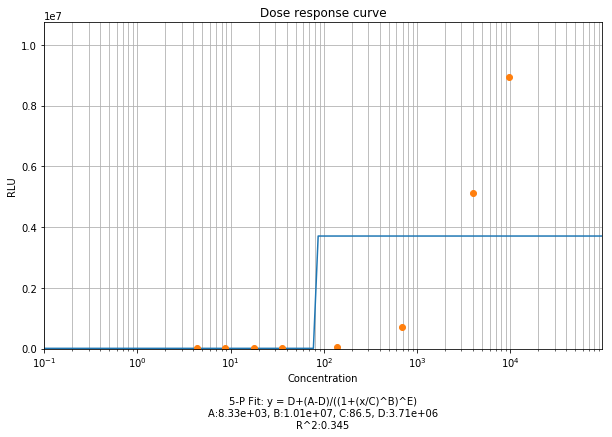

In [39]:
def logistic5(x, A, B, C, D, E):
    """5PL logistic equation."""
    return D + (A-D)/((1 + (x/C)**B))**abs(E)

def maxSlope(x_list, y_list):
    x_list = [math.log10(l) for l in [float(i) for i in x_list]]
    coordinates = zip(x_list, y_list)
    x_1, y_1 = 1, y_list[0] #Trying to make sure first calculation always has zero on top and non-zero on bottom
    slopeList = []
    for x_2, y_2 in coordinates:
        slopeList.append(abs((y_2 - y_1)/(x_2 - x_1))) #Parameter B should always be positive so using abs
        x_1, y_1 = x_2, y_2
    return(max(slopeList))

# Initial guess for parameters
p0 = [y_list[0], maxSlope(x_list,y_list), median(x_list), y_list[-1], 1]
print(p0)

# Fit equation using least squares optimization
popt, pcov = curve_fit(logistic5, x_list, y_list, p0, bounds=(0, np.inf))
print(*popt)

# Calculate R^2
r_squared = (1 
             - sum([(y_meas - y_calc)**2 for y_meas, y_calc in zip(y_list, [logistic5(x_std, *popt) for x_std in x_list])])
             / sum([(y_meas - mean(y_list))**2 for y_meas in y_list]))

xCont = np.linspace(0.1, 10*max(x_list), 10000)
fittedData=[logistic5(xVal, *popt) for xVal in xCont]
fig1 = plt.figure(figsize=(10,6))
ax=fig1.add_subplot(1,1,1)
ax.plot(xCont, fittedData)
ax.set_ylabel("RLU")
ax.set_xlabel("""Concentration

5-P Fit: y = D+(A-D)/((1+(x/C)^B)^E)
A:{1:0.3g}, B:{2:0.3g}, C:{3:0.3g}, D:{4:0.3g}
R^2:{0:0.3g}""".format(r_squared, *popt))
ax.grid(True, which='both')
ax.set_title("Dose response curve")
plt.xscale('log')
plt.yscale('log')
plt.plot(x_list, y_list, 'o')
plt.axis([0.1, 10*max(x_list), 0, 1.2*max(y_list)])

In [37]:
print(p0)
xCont = np.linspace(0.1, 10*max(x_list), 10000)
fittedData=[logistic5(xVal, p0) for xVal in xCont]
fig1 = plt.figure(figsize=(10,6))
ax=fig1.add_subplot(1,1,1)
ax.plot(xCont, fittedData)
ax.set_ylabel("RLU")
ax.set_xlabel("""Concentration

5-P Fit: y = D+(A-D)/((1+(x/C)^B)^E)
A:{1:0.3g}, B:{2:0.3g}, C:{3:0.3g}, D:{4:0.3g}
R^2:{0:0.3g}""".format(r_squared, *popt))
ax.grid(True, which='both')
ax.set_title("Dose response curve")
plt.xscale('log')
plt.yscale('log')
plt.plot(x_list, y_list, 'o')
plt.axis([0.1, 10*max(x_list), 0, 1.2*max(y_list)])

[3524.9625614999995, 10083139.639109699, 86.525, 8947379.649999999, 10000]


TypeError: logistic5() missing 4 required positional arguments: 'B', 'C', 'D', and 'E'